![texto alternativo](https://m.media-amazon.com/images/M/MV5BNzdkMzQ5OTctZmM5ZS00N2QwLWEzNTEtNzZjZDlhMTEwYWZkXkEyXkFqcGdeQXVyMjMzMDI4MjQ@._V1_SX1777_CR0,0,1777,999_AL_.jpg)

---
# **NAUFRÁGIO DO TITANIC: ANÁLISE USANDO DATA SCIENCE**

---
---

Última atualização em 03 de agosto de 2020

---

O desafio de Data Science do Titanic é um dos mais conhecidos mundialmente entre os cientistas de dados, em termos comparativos, é o "Hello, World!" para quem está começando na área de aprendizado de máquina.

Essa competição de introdução ao maravilhoso universo da Ciência de Dados é promovido pelo site do Kaggle, plataforma gerenciada pela Google, que disponibiliza diversos desafios e conjunto de dados.

**Afinal, quem nunca ouviu falar da tragédia do Titanic?**

Com certeza, a maioria das pessoas conhecem a história do naufrágio desse navio conhecido tecnicamente como RMS Titanic. Ele foi operado pela empresa White Star Line e seu projeto durou cerca de 4 anos, tendo início em setembro de 1908 e comissionamento em abril de 1912. A embarcação foi construída para ser a melhor de sua época, em questões de luxo, segurança e engenharia, alcançando o lendário status de "inafundável".

Sua viagem inaugural, iniciada em dia 10 de abril de 1912, tinha rota traçada de Southampton para Nova Iorque, levando cerca de 2.200 passageiros. Contudo, apesar de todos os avanços tecnológicos incorporados ao projeto do Titanic, às 23h40min do dia 15 de abril de 1912, após colidir com um iceberg, o navio naufragou nas águas do Oceano Atlântico, matando mais de 1.500 pessoas.
Diversos fatores contribuíram para a tragédia do Titanic, dentre elas, o número insuficiente de bote salva-vidas para as pessoas a bordo e diversas falhas técnicas por parte da tripulação. Atualmente, o navio está submerso a 3.800 metros de profundidade no Oceano Atlântico, a cerca 600 km da costa de Newfoundland, no Canadá.

**A partir do cenário da tragédia do Titanic podemos levantar alguns questionamentos:**

* Será que alguns grupos de passageiros tiveram mais "sorte" que outros?

* Mulheres e crianças tiveram mais chances de sobreviver?

* Os passageiros que alguns passageiros foram menos favorecidos, apenas pelo fato de tirem embarcado na 3ª Classe?


Com os dados reais disponibilizados, usando ferramentas da Ciência de Dados, você pode realizar análises exploratória, encontrar padrões nos dados e criar modelos preditivos para descobrir, por exemplo, qual seria a probabilidade de você e sua família ou amigos sobreviverem ao trágico naufrágio.

No página do Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic), podemos encontrar disponíveis a descrição completa do desafio e os conjuntos de dados a serem utilizados.


### **Objetivo**

Inicialmente, será realizada uma análise exploratória do conjunto de dados, a fim de entender o comportamento das variáveis, como elas se distribuem e qual o grau de influência que cada uma representa na probabilidade de sobrevivência dos passageiros.
Em seguida, após a análise dos dados, serão implementados modelos de Machine Learning com o objetivo de tentar prever quais as chances de sobrevivência de um passageira qualquer.

### **Aquisição dos Dados**

Todos os dados necessários para a análise e construção do modelo foram retirados da [página do desafio do Titanic](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fc%2Ftitanic%2Fdata) no site Kaggle, os quais foram baixados e armazenados no [meu repositório do Github](https://medium.com/r/?url=https%3A%2F%2Fgithub.com%2Fjeffersonverissimo%2Fdatasets%2Ftree%2Fmaster%2Ftitanic). Os dados foram divididos em dois conjuntos:

* **Conjunto de treino (train.csv):** composto por diversas informações sobre os passageiros, como gênero, classe de embarque, idade, etc. Esse conjunto também deve ser usado para construir e treinar o modelo de Machine Learning, nele é informado se o passageiro sobreviveu ou não.
* **Conjunto de teste (test.csv):** este dataset não informa se o passageiro sobreviveu ou não, e deve ser usado como dados nunca vistos pelo modelo, de forma a verificar o desempenho do mesmo.

Como se trata de um desafio, o participante deve submeter suas análises na plataforma do Kaggle que, por sua vez, também disponibiliza um gabarito (gender_submission.csv) informando como as previsões devem ser enviadas.

In [1]:
# IMPORTAÇÃO DAS PRINCIPAIS BIBLIOTECAS

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
paleta_cores = ["#34495e", "#5497B0", "#89B7D0"]
sns.set(style = "dark", palette = paleta_cores, color_codes = True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# AQUISIÇÃO DOS CONJUNTOS DE DADOS

treino = pd.read_csv('https://raw.githubusercontent.com/jeffersonverissimo/datasets/master/titanic/train.csv')
teste =  pd.read_csv('https://raw.githubusercontent.com/jeffersonverissimo/datasets/master/titanic/test.csv')

### **Análise Exploratória**

Esta etapa é considerada por muitos cientistas de dados como a mais importante, uma vez que ela consome cerca de 70% do tempo total do projeto. As principais informações e respostas para perguntas iniciais podem ser obtidas através da análise exploratória dos dados, além disso, o desempenho dos modelos de machine learning construídos dependem diretamente desta etapa do projeto.

Agora, usando a biblioteca Pandas, poderemos importar e visualizar os conjuntos de dados.

In [3]:
# VISIALIZAÇÃO DAS 10 PRIMEIRAS LINHAS

treino.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Para ajudar a acompreender as variáveis do conjunto de dados, podemos contar com o auxílio de um dicionário.**

* **PassengerID:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao naufrágio 
 * 0 = não
 * 1 = sim
* **PCclass:** Classe do bilhete 
 * 1 = 1ª classe
 * 2 = 2ª classe
 * 3 = 3ª classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e/ou irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto de embarque
 * C = Cherbourg
 * Q = Queenstown
 * S = Southampton

Agora, que já sabemos do que se trata cada variável do dataset, podemos começar as análises.

**Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui?**

In [4]:
print('Colunas:', treino.shape[1])
print('Linhas:', treino.shape[0])

Colunas: 12
Linhas: 891


**Quais os tipos das variáveis?**

In [5]:
treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

O conjunto de dados contém 7 variáveis numéricas e 5 do tipo *object*, estas últimas são *strings*, como pudemos observar nas primeiras linhas do *dataset*.

**Há dados faltantes no *dataset*?**

In [6]:
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Apenas três variáveis possuem valores ausentes, `Age`, `Cabin` e `Embarked`, sendo que a maior quantidade de dados faltantes estão presentes na coluna ***Cabin***, *687* entradas ausentes. Enquanto ***Age*** possui 177 entradas faltantes e ***Embarked*** possui 2.

Dentre essas variáveis, a que pode apresentar maiores problemas ao implementarmos um modelo de machine learning é a `Age`, uma vez que corresponde a catacterísticas diretas dos passageiros, sendo um dado fundamental durante a análise exploratória.

Contudo, podemos tratar esses valores ausentes mais adiante, usando algumas alternativas para remover ou substituir esses dados faltantes.

**Qual a distribuição estatística dos dados?**

In [7]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Acima, podemos ver o resumo dos principais parâmetros estatísticos do nosso conjunto de dados, nele são apresentados valores de média, mediana, desvio padrão, etc. E claro, esse resumo se refere apenas às variáveis numéricas.

Mais precisamente, as variáveis que realmente importam nesse caso, são `Pclass`, `Age`, `SibSb`, `Parch` e `Fare`, uma vez que `PassengerID` e `Survived` identificam o número do passageiro e se ele sobreviveu ao desastre, respectivamente.

**Existem *outliers* no conjunto de dados?**

É fundamental sabermos identificar a presença de *outliers* no nosso *dataset*, dados que se diferenciam muito dos outros, ou seja, são valores que fogem da normalidade. Esses *outliers* podem influenciar drasticamente uma determinada análise realizada no *dataset*, causando problemas nos resulados obtidos.

Graficamente, os *outliers* podem ser identificados através de histogramas ou usando o **boxplot**, e é isso que será feito em seguida.

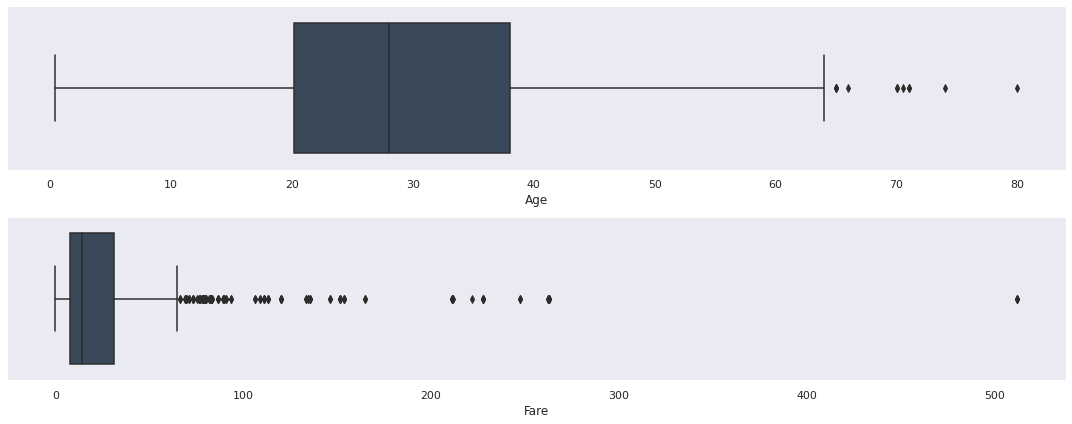

In [8]:
fig, (axis1, axis2) = plt.subplots(2,1, figsize = (15,6))
sns.boxplot(data = treino, x = 'Age', ax = axis1)
sns.boxplot(data = treino, x = 'Fare', ax = axis2)

plt.tight_layout()

Acima, podemos perceber que existem *outliers* presentes no conjunto de dados, mais especificamente, os gráficos mostram esses resultados para as variáveis `Age` e `Fare`. É provável que existam valores discrepantes presentes em outras variáveis também.

Assim, teremos que analisar melhor e tratar esses dados.

#### **Após extrairmos algumas informações iniciais do conjunto de dados, podemos partir para questionamentos mais específicos, relacionados diretamente à chance de sobrevivência de um determinado grupo de passageiros, considerando classe de embarque, sexo, idade, etc.**

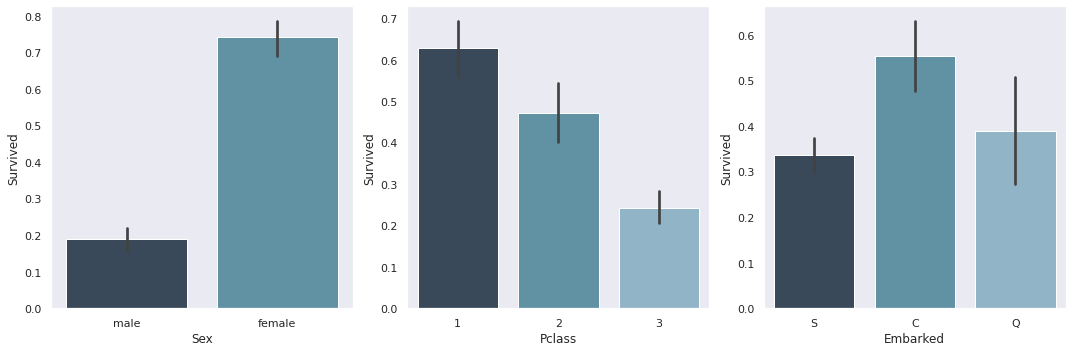

In [9]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,5))

sns.barplot(data = treino, x = 'Sex', y = 'Survived', ax = axis1)
sns.barplot(data = treino, x = 'Pclass', y = 'Survived', ax = axis2)
sns.barplot(data = treino, x = 'Embarked', y = 'Survived', ax = axis3)

plt.tight_layout()

A partir da análise dos três gráficos acima, podemos extrair duas informações importantes:

* As mulheres têm muito mais chances de sobreviverem do que os homens, enquanto elas possuem cerca de **75%** de chances, os homens apresentam cerca de **18%**.

* Os passageiros que viajaram na **1ª Classe** possuem mais que o dobro de chances de sobreviverem em relação aos que compraram a **3ª Classe**.

* Os passageiros que embarcaram a partir da cidade de **Cherbourg** são os que mais têm chances de sobreviverem, enquanto os que embarcaram em **Southampton**, possuem as menores chances.

As probabilidades de sobrevivência das mulheres no desastre do Titanic se estestem para todos os casos individuais, para todas as classes de viagem e cidades de embarque, como podemos observar nos gráficos abaixo.

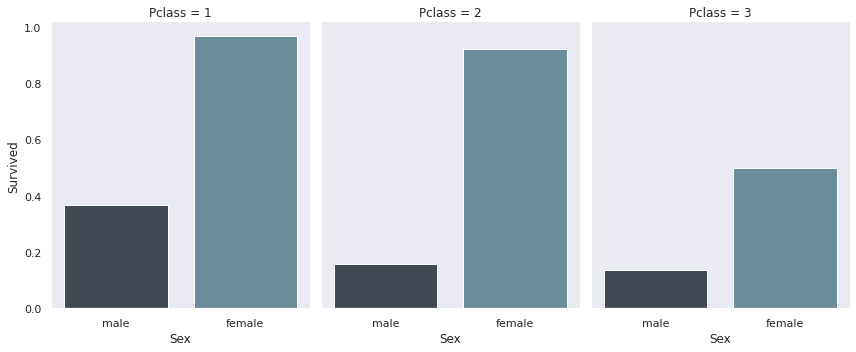

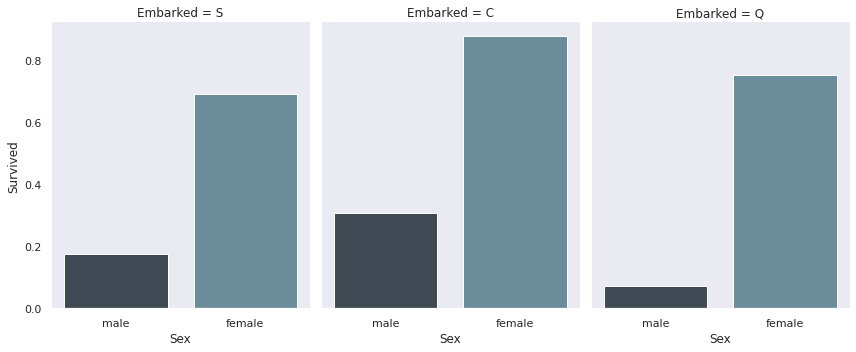

In [10]:
sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = treino, saturation = .5, kind = "bar", ci = None, aspect = 0.8)
sns.catplot(x = "Sex", y = "Survived", col = "Embarked", data = treino, saturation = .5, kind = "bar", ci = None, aspect = 0.8)

plt.tight_layout()

Também podemos realizar a análise em relação às idades dos passageiros e saber quais tiveram mais chances de sobreviver.

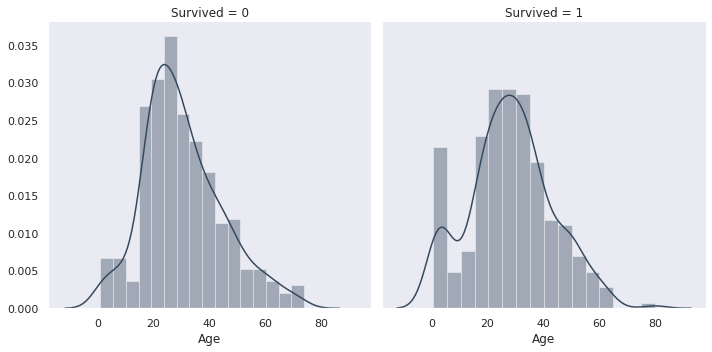

In [11]:
sns.FacetGrid(treino, col = 'Survived', height = 5).map(sns.distplot, 'Age')

plt.tight_layout()

OS gráficos acima mostram a distribuição de idades para os sobreviventes e mortes no naufrágio, podemos perceber que a maior parte dos passageiros, nas duas situações, possuem idades entre 20 e 30 anos.

No gráfico da direita (sobreviventes), podemos perceber que há um pico nos passageiros que possuem idade de até 5 anos, mostrando que crianças um pouco menores têm mais chances de sobreviver.



**Qual a correlação entre as variáveis do *dataset*?**

Através desse gráfico, podemos entender a correlação entre as variáveis, se é positiva ou negativa.

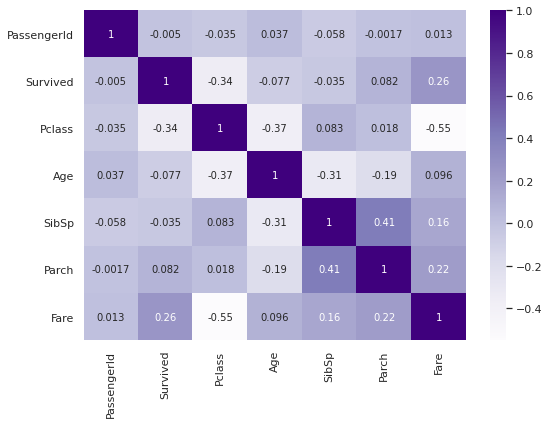

In [12]:
# colormap = sns.diverging_palette(220, 10, as_cmap = True)

fig, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(treino.corr(), fmt = '.2g', cmap = 'Purples', annot= True)
plt.tight_layout()

As maiores correlações apresentadas foram entre as variáveis Parch (Quantidade de pais e filhos a bordo) e SibSp (Quantidade de cônjuges e irmãos a bordo), cujo valor é de 0,41.

Ao final dessa análise exploratória, foi possível entender melhor os dados e como eles se comportam, extraindo informações que serão importantes ao implementar o modelo de machine learning, pois será mais fácil escolher as melhores variáveis para melhorar o desempenho do modelo.

### **Modelo de Machine Learning**

O modelo preditivo a ser implementado após a análise exploratória será de Aprendizado Supervisionado, com base nisso e nas descrições das colunas do dataset, é fácil identificar que a coluna Survived é a variável alvo (target).
Agora que já sabemos o comportamento geral dos dados, podemos prepará-los para construir o modelo de machine learning, selecionando as melhores features e limpando os dados necessários.

Neste projeto, serão implementados modelos de classificação, pois procuramos saber quais passageiros sobreviveram ou não ao naufrágio. Mais especificamente, os modelos de Regressão Logística, Árvore de Decisão e Máquina de Vetor de Suporte (SVM) serão utilizados. Os desempenhos de cada modelo serão analisados e comparados considerando as devidas métricas para modelos de classificação.

Por fim, mas não menos importante, após realizar as análises de desempenho dos modelos, serão submetidos à competição do Kaggle e verificar o score alcançado.

**Preparação dos Dados**

Nesta etapa, devemos nos preocupar em fazer os ajustes finais dos dados e tratá-los para alimentar o modelo. Esses ajustes envolver a seleção das features, criação de novas variáveis, limpeza dos dados, separação do dataset, etc.

**Organização dos Conjuntos de Dados**

Apesar de os datasets de treino e testes estarem inicialmente separados, uma boa prática é juntá-los em um único dataset para poder aplicar as devidas alterações e depois separá-los novamente. Isso, além de importante, oferece praticidade, pois as mudanças precisam ser as mesmas para os dois conjuntos de dados.

In [13]:
# SALVANDO OS ÍNDICES PARA RECUPERAÇÃO DOS CONJUNTOS DE DADOS

treino_ID = treino.shape[0]

teste_ID = teste.shape[0]

In [14]:
# SALVANDO O 'PASSANGERID' PARA SUBMISSÃO NO KAGGLE

Passenger_ID = teste.PassengerId

In [15]:
# SALVANDO VARIÁVEL ALVO (TARGET) E SEPARANDO DO DATASET DE TREINO

target = treino['Survived'].copy()
treino.drop(['Survived'], axis = 1, inplace = True)

In [16]:
# JUNTANDO OS CONJUNTOS DE DADOS

df_total = pd.concat(objs = [treino, teste], axis = 0).reset_index(drop = True)

In [17]:
# TAMANHO DO NOVO DATASET

df_total.shape

(1309, 11)

**Selecionando as Principais Variáveis**

Nesta etapa, é fundamental selecionarmos as variáveis que realmente são relevantes para a construção do modelo. Contudo, vale ressaltar que nem sempre fazemos as melhores escolhas ao selecionar as features, sendo preciso repensar e avaliar novamente a significância das variáveis. Neste projeto, serão consideradas apenas as variáveis `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`.

Assim, as demais variáveis serão descartadas neste momento, por não serem relevantes.

In [18]:
# REMOVENDO AS VARIÁVEIS IRRELEVANTES

df_total.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [19]:
# RESUTLADO

df_total.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


**Tratando os Valores Ausentes**

Como comentado anteriormente, a presença de valores faltantes no conjunto de dados influencia diretamente as análises exploratória e o aprendizado dos modelos. Desta forma, precisamos tratar esses dados adotando alguns métodos, por exemplo, excluindo esses valores ou substituindo-os por outros que possivelmente representem bem esses dados.

Contudo, cada conjunto de dados é tratado de maneira diferente, cabendo ao cientista de dados encontrar a melhor solução. Apesar de ser uma opção, não é interessante, na maioria das vezes, excluir dos dados. Em vez disso, é melhor substituir esses dados faltantes pela média ou mediana, por exemplo.

In [20]:
df_total.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Podemos perceber pela imagem acima que a maior quantidade de dados faltantes está presente na variável `Age` e, como visto anteriormente, essa coluna também possui outliers. As colunas `Fare` e `Embarked` também apresentam valores faltantes, mas insignificantes, em quantidade, quando comparados à variável `Age`.

Neste trabalho, serão utilizados os valores das medianas para substituir os dados ausentes das variáveis **Age** e **Fare**, enquanto para **Embarked** será usado o valor mais frequente.

In [21]:
# MEDIANA DA COLUNA 'AGE'

Age_mediana = df_total['Age'].median()
df_total['Age'].fillna(Age_mediana, inplace = True)

# MEDIANA DA COLUNA 'FARE'

Fare_mediana = df_total['Fare'].median()
df_total['Fare'].fillna(Fare_mediana, inplace = True)

# VERIFICANDO O VALOR MAIS FREQUENTE DA COLUNA 'EMBARKED'

df_total['Embarked'].mode()

# SUBSTITUINDO O VALOR

df_total['Embarked'].fillna('S', inplace = True)

In [22]:
# VERIFICANDO O RESULTADO DAS SUBSTITUIÇÕES

df_total.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Ajustando as Variáveis para o Modelo**

Após tratar os dados ausentes, o tratamento dos dados está praticamente concluído. Agora, é preciso converter os dados que irão alimentar o modelo de categóricos para numéricos.

Neste caso, as variável 'Sex' e 'Embarked' serão convertidas para valores numéricos.

In [23]:
# TRANSFORMANDO AS VARIÁVEIS PARA NUMÉRICAS

df_total['Sex'] = df_total['Sex'].map({'male' : 1, 'female' : 0})

df_total['Embarked'] = df_total['Embarked'].astype('category')
df_total['Embarked'] = df_total['Embarked'].cat.codes

In [38]:
# VISUALIZANDO O RESUTLADO

df_total.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


Outra opção seria tratar as variáveis usando o One Hot Encoding do Scikit-learn para converter as variáveis para numéricas.


**Recuperando os Conjuntos de Treino e Teste**

Depois de aplicar as devidas alterações nos conjuntos de dados, podemos separá-los novamente e obter os dados de treino e teste a partir do índice que salvamos no início, treino_ID e teste_ID.

In [25]:
# SEPARANDO OS CONJUNTOS DE DADOS

treino = df_total.iloc[:treino_ID]

teste = df_total.iloc[treino_ID:]

In [26]:
# VISUALIZANDO RESULTADOS

display(treino.head())

display(teste.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,7.8292,1
892,3,0,47.0,1,0,7.0000,2
893,2,1,62.0,0,0,9.6875,1
894,3,1,27.0,0,0,8.6625,2
895,3,0,22.0,1,1,12.2875,2


**Implementação do Modelo**

Esta etapa costuma ser mais rápida de ser realizada, justamente porque a maior parte do tempo foi investido na análise exploratória e tratamento dos dados. Outro fator, é que a implementação dos modelos de machine learning são muito automatizados, sendo necessário apenas algumas linhas de código para treinar, testar e avaliar o modelo.

Como citado anteriormente, serão implementados os modelos de Regressão Logística, Árvore de Decisão e Máquina de Vetor de Suporte (SVM). Para esta finalidade, será utilizada a biblioteca Scikit-Learn.

### **Regressão Logística**

In [27]:
# IMPORTAÇÃO DO MODELO

from sklearn.linear_model import LogisticRegression

# INSTANCIANDO O MODELO

LR_model = LogisticRegression(solver = 'liblinear')

# TREINANDO O MODELO

LR_model.fit(treino, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# PREDIÇÃO DO MODELO

y_pred_LR = LR_model.predict(teste)

**Avaliação**

In [29]:
# ACURÁCIA DO MODELO

acc_logReg = round(LR_model.score(treino, target)*100, 2)

print('Acurácia RL: ', acc_logReg)

Acurácia RL:  80.36


### **Árvore de Decisão**

In [30]:
# IMPORTAÇÃO DO MODELO

from sklearn.tree import DecisionTreeClassifier

# INSTANCIANDO O MODELO

DT_model = DecisionTreeClassifier(max_depth = 3)

# TREINANDO O MODELO

DT_model.fit(treino, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
# PREDIÇÃO DO MODELO

y_pred_DT = DT_model.predict(teste)

**Avaliação**

In [32]:
# ACURÁCIA DO MODELO

acc_tree = round(DT_model.score(treino, target)*100, 2)

print('Acurácia DT: ', acc_tree)

Acurácia DT:  82.72


### **Máquina de Vetor de Suporte**

In [33]:
# IMPORTAÇÃO DO MODELO

from sklearn import svm

# INSTANCIANDO O MODELO

SVM_model = svm.SVC(C = 1, kernel = 'linear')

# TREINAMENTO DO MODELO

SVM_model.fit(treino, target)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Avaliação**

In [34]:
# ACURÁCIA DO MODELO

acc_svm = round(SVM_model.score(treino, target)*100, 2)

print('Acurácia DT: ', acc_svm)

Acurácia DT:  78.68


In [35]:
y_pred_SVM = SVM_model.predict(teste)

### **Submissão dos Resultados na Plataforma Kaggle**

A última etapa do projeto é submetir as previsões de cada modelo no Kaggle e ver o desempenho.

Para isso, precisamos gerar os arquivos de submissão.

In [36]:
# REGRESSÃO LOGÍSTICA

submission = pd.DataFrame({'PassengerID': Passenger_ID, 'Survived': y_pred_LR})

submission.to_csv('./submission_LR.csv', index = False)

# ÁRVORE DE DECISÃO

submission = pd.DataFrame({'PassengerID': Passenger_ID, 'Survived': y_pred_DT})

submission.to_csv('./submission_DT.csv', index = False)

# MÁQUINA DE VETOR DE SUPORTE - SVM

submission = pd.DataFrame({'PassengerID': Passenger_ID, 'Survived': y_pred_SVM})

submission.to_csv('./submission_SVM.csv', index = False)


O modelo que apresentou o melhor resultado quando submetido ao Kaggle foi o de Árvore de Decisão, com score igual a 0,77511.

É importante ressaltar que este foram modelos iniciais e que várias alterações podem ser feitas para melhorar os modelos.